#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('seaborn')

#### Import the data to work with

In [2]:
#loads the first data as wh
#loads the second data as continent

wh = pd.read_csv("data\WHR2023.csv", index_col=None, header=0)

continent = pd.read_csv("data\continentsWHR2023.csv", index_col=None, header=0)

#### View imported data

In [3]:
display(wh.head(3))

continent.head(3)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.15,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.25,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.05,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN


In [4]:
#shows the properties of wh

wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

#### Data preparation on wh

In [5]:
#reviews if there are duplicated columns in wh

wh.duplicated().sum()

0

In [6]:
#drop irrelevant columns in wh

wh.drop(['Standard error of ladder score', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita',\
         'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',\
         'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual','upperwhisker','lowerwhisker'], axis=1, inplace=True)

In [7]:
#drop null rows using Healthy Life Expectancy column as the basis

wh.dropna(subset='Healthy life expectancy', inplace=True)

#### Data preparation on continent

In [8]:
#shows the properties of continent

continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [9]:
#drop columns that are not needed from the continent data

continent.drop(['alpha-2','country-code','iso_3166-2','intermediate-region','region-code','sub-region-code',\
                'intermediate-region-code'], axis=1,inplace=True)

In [10]:
#rename some columns for easy identification in the future

continent = continent.rename(columns={'name':'Country name', 'alpha-3':'Country abbreviation'})

In [11]:
#display the tables prior to joining them

display(wh.head(3))
continent.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668


,Country name,Country abbreviation,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe


- The two tables are joined based on the common field or column they share (Country name) to a single dataframe
- Create dataframe wh2023

#### Merge Dataframes 

In [12]:
#join the two tables based on the common column

wh2023 = pd.merge(wh, continent, how='left', on='Country name')

In [13]:
#properties of the new dataframe

wh2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  136 non-null    object 
 1   Ladder score                  136 non-null    float64
 2   Logged GDP per capita         136 non-null    float64
 3   Social support                136 non-null    float64
 4   Healthy life expectancy       136 non-null    float64
 5   Freedom to make life choices  136 non-null    float64
 6   Generosity                    136 non-null    float64
 7   Perceptions of corruption     136 non-null    float64
 8   Country abbreviation          126 non-null    object 
 9   region                        126 non-null    object 
 10  sub-region                    126 non-null    object 
dtypes: float64(7), object(4)
memory usage: 12.8+ KB


In [14]:
#view the countries/rows that have null values in the dataframe

null_countries = wh2023.isnull()
null = wh2023[null_countries.any(axis=1)]
null

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country abbreviation,region,sub-region
17,Czechia,6.845,10.611,0.953,69.050,0.903,0.040,0.859,NaN,NaN,NaN
26,Taiwan Province of China,6.535,10.797,0.884,69.600,0.804,-0.129,0.681,NaN,NaN,NaN
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,NaN,NaN,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,77.280,0.687,-0.026,0.385,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,NaN,NaN,NaN
86,North Macedonia,5.254,9.703,0.805,66.500,0.769,0.131,0.902,NaN,NaN,NaN
92,Ivory Coast,5.053,8.576,0.572,55.953,0.733,0.003,0.746,NaN,NaN,NaN
104,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,NaN,NaN,NaN
131,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,NaN,NaN,NaN


In [15]:
#view each country with the null value from the continent dataframe

filt = continent[continent['Country name'].str.contains("Congo")]
filt

,Country name,Country abbreviation,region,sub-region
50,Congo,COG,Africa,Sub-Saharan Africa
51,Congo (Democratic Republic Of The),COD,Africa,Sub-Saharan Africa


In [16]:
#rename the countries' name to match the countries' name in continent dataframe

wh.replace({'Czechia':'Czech Republic',\
            'Taiwan Province of China':'Taiwan',
            'Bosnia and Herzegovina':'Bosnia And Herzegovina',
            'Hong Kong S.A.R. of China':'Hong Kong',
            'Congo (Brazzaville)':'Congo (Democratic Republic Of The)',
            'North Macedonia':'Macedonia',
            "Ivory Coast":"Côte D'Ivoire",
            "Turkiye":"Turkey",
            "Congo (Kinshasa)": "Congo"}, inplace=True)

In [17]:
#re-join the two dataframes

wh2023 = pd.merge(wh, continent, how='left', on='Country name')

In [18]:
wh2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  136 non-null    object 
 1   Ladder score                  136 non-null    float64
 2   Logged GDP per capita         136 non-null    float64
 3   Social support                136 non-null    float64
 4   Healthy life expectancy       136 non-null    float64
 5   Freedom to make life choices  136 non-null    float64
 6   Generosity                    136 non-null    float64
 7   Perceptions of corruption     136 non-null    float64
 8   Country abbreviation          135 non-null    object 
 9   region                        135 non-null    object 
 10  sub-region                    135 non-null    object 
dtypes: float64(7), object(4)
memory usage: 12.8+ KB


In [19]:
#view the row with null values

null_df = wh2023.isnull()
null_rows = null_df.any(axis=1)
null_rows_df = wh2023[null_rows]
null_rows_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country abbreviation,region,sub-region
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,NaN,NaN,NaN


In [20]:
#opt to fill the missing info about Kosovo
#findings on Kosovo reveal the info filled

wh2023['Country abbreviation'] = wh2023['Country abbreviation'].fillna('XK')
wh2023['region'] = wh2023['region'].fillna('Europe')
wh2023['sub-region'] = wh2023['sub-region'].fillna('Southern Europe')

#### Ladder Score is an important index used in ranking world countries' happiness. Numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life and the bottom of the ladder represents the worst possible life.

In [21]:
#Create a new column which is to be ranked based on Ladder Score

wh2023['Global Ranking'] = wh2023['Ladder score'].rank(ascending=False).astype('int64')

In [22]:
wh2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  136 non-null    object 
 1   Ladder score                  136 non-null    float64
 2   Logged GDP per capita         136 non-null    float64
 3   Social support                136 non-null    float64
 4   Healthy life expectancy       136 non-null    float64
 5   Freedom to make life choices  136 non-null    float64
 6   Generosity                    136 non-null    float64
 7   Perceptions of corruption     136 non-null    float64
 8   Country abbreviation          136 non-null    object 
 9   region                        136 non-null    object 
 10  sub-region                    136 non-null    object 
 11  Global Ranking                136 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 13.8+ KB


In [23]:
#the columns are titled

wh2023 = wh2023.rename(columns=lambda x: x.title())

wh2023 = wh2023.rename(columns={'Logged Gdp Per Capita':'Logged GDP Per Capita'})

wh2023.head()

,Country Name,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Country Abbreviation,Region,Sub-Region,Global Ranking
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,FIN,Europe,Northern Europe,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,DNK,Europe,Northern Europe,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,ISL,Europe,Northern Europe,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,ISR,Asia,Western Asia,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,NLD,Europe,Western Europe,5


In [24]:
#re-arrange the columns 

wh2023 = wh2023.iloc[:,[11, 0, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7]]

### Top 10 Happiest Countries in the World 2023

In [25]:
#view top 10 rows

top_10 = wh2023.head(10)
top_10

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
0,1,Finland,FIN,Europe,Northern Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,2,Denmark,DNK,Europe,Northern Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,3,Iceland,ISL,Europe,Northern Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,4,Israel,ISR,Asia,Western Asia,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,5,Netherlands,NLD,Europe,Western Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379
5,6,Sweden,SWE,Europe,Northern Europe,7.395,10.883,0.939,72.150,0.948,0.165,0.202
6,7,Norway,NOR,Europe,Northern Europe,7.315,11.088,0.943,71.500,0.947,0.141,0.283
7,8,Switzerland,CHE,Europe,Western Europe,7.240,11.164,0.920,72.900,0.891,0.027,0.266
8,9,Luxembourg,LUX,Europe,Western Europe,7.228,11.660,0.879,71.675,0.915,0.024,0.345
9,10,New Zealand,NZL,Oceania,Australia and New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271


Text(0, 0.5, 'Ladder Score')

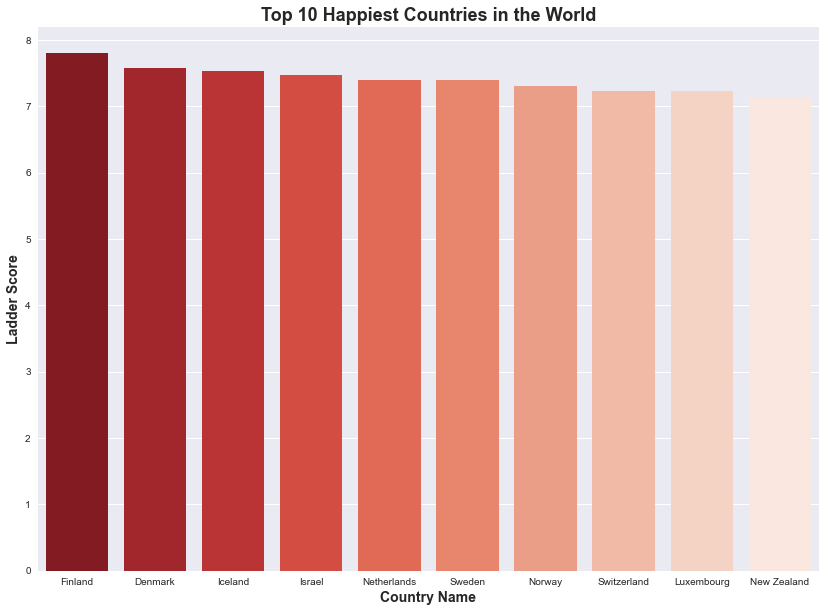

In [26]:
plt.figure(figsize=(14,10))
sns.barplot(x='Country Name', y='Ladder Score', data=top_10, palette='Reds_r')
plt.title('Top 10 Happiest Countries in the World', fontweight='bold', fontsize=18)
plt.xlabel('Country Name', fontweight='bold', fontsize=14)
plt.ylabel('Ladder Score', fontweight='bold', fontsize=14)

### Least 10 Happiest Countries in the World 2023

In [27]:
#view bottom 10 

bottom_10 = wh2023.tail(10)
bottom_10

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
126,127,Zambia,ZMB,Africa,Sub-Saharan Africa,3.982,8.074,0.694,55.032,0.791,0.098,0.818
127,128,Tanzania,TZA,Africa,Sub-Saharan Africa,3.694,7.857,0.653,59.401,0.838,0.182,0.554
128,129,Comoros,COM,Africa,Sub-Saharan Africa,3.545,8.075,0.471,59.425,0.470,-0.014,0.727
129,130,Malawi,MWI,Africa,Sub-Saharan Africa,3.495,7.302,0.531,58.475,0.750,0.005,0.749
130,131,Botswana,BWA,Africa,Sub-Saharan Africa,3.435,9.629,0.753,54.725,0.742,-0.215,0.830
131,132,Congo,COG,Africa,Sub-Saharan Africa,3.207,7.007,0.652,55.375,0.664,0.086,0.834
132,133,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,3.204,7.641,0.690,54.050,0.654,-0.046,0.766
133,134,Sierra Leone,SLE,Africa,Sub-Saharan Africa,3.138,7.394,0.555,54.900,0.660,0.105,0.858
134,135,Lebanon,LBN,Asia,Western Asia,2.392,9.478,0.530,66.149,0.474,-0.141,0.891
135,136,Afghanistan,AFG,Asia,Southern Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847


Text(0, 0.5, 'Ladder Score')

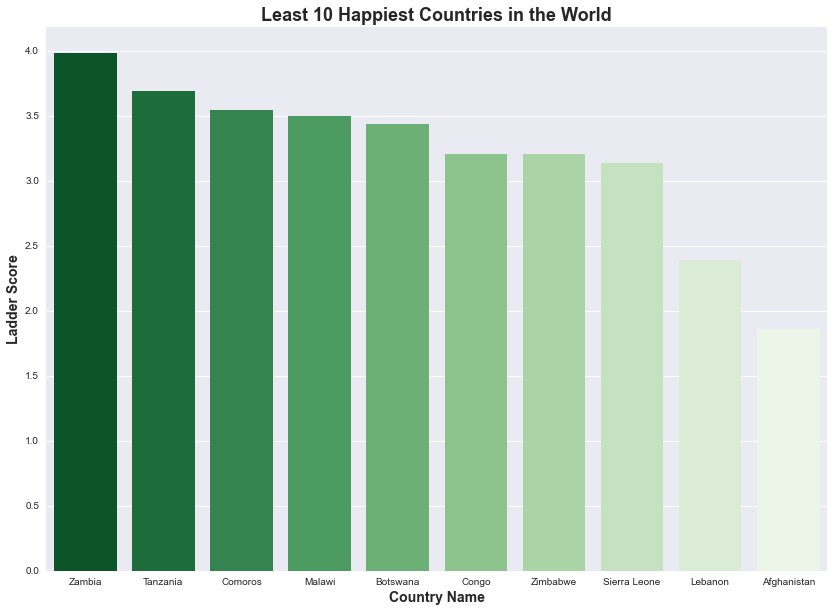

In [28]:
plt.figure(figsize=(14,10))
sns.barplot(x='Country Name', y='Ladder Score', data=bottom_10, palette='Greens_r')
plt.title('Least 10 Happiest Countries in the World', fontweight='bold', fontsize=18)
plt.xlabel('Country Name', fontweight='bold', fontsize=14)
plt.ylabel('Ladder Score', fontweight='bold', fontsize=14)

### Top 10 Happiest Countries in Europe 2023

In [29]:
europe = wh2023[wh2023['Region'] == 'Europe']

europe.head(10)

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
0,1,Finland,FIN,Europe,Northern Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,2,Denmark,DNK,Europe,Northern Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,3,Iceland,ISL,Europe,Northern Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668
4,5,Netherlands,NLD,Europe,Western Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379
5,6,Sweden,SWE,Europe,Northern Europe,7.395,10.883,0.939,72.150,0.948,0.165,0.202
6,7,Norway,NOR,Europe,Northern Europe,7.315,11.088,0.943,71.500,0.947,0.141,0.283
7,8,Switzerland,CHE,Europe,Western Europe,7.240,11.164,0.920,72.900,0.891,0.027,0.266
8,9,Luxembourg,LUX,Europe,Western Europe,7.228,11.660,0.879,71.675,0.915,0.024,0.345
10,11,Austria,AUT,Europe,Western Europe,7.097,10.899,0.888,71.150,0.855,0.102,0.497
13,14,Ireland,IRL,Europe,Northern Europe,6.911,11.527,0.905,71.300,0.874,0.092,0.358


### Top 10 Happiest Countries in America 2023

In [30]:
americas = wh2023[wh2023['Region'] == 'Americas']

americas.head(10)

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
12,13,Canada,CAN,Americas,Northern America,6.961,10.773,0.929,71.400,0.874,0.153,0.420
14,15,United States,USA,Americas,Northern America,6.894,11.048,0.919,65.850,0.800,0.137,0.689
22,23,Costa Rica,CRI,Americas,Latin America and the Caribbean,6.609,9.952,0.872,70.000,0.895,-0.070,0.768
27,28,Uruguay,URY,Americas,Latin America and the Caribbean,6.494,10.037,0.913,67.500,0.895,-0.065,0.575
34,35,Chile,CHL,Americas,Latin America and the Caribbean,6.334,10.114,0.889,70.300,0.792,-0.011,0.823
35,36,Mexico,MEX,Americas,Latin America and the Caribbean,6.330,9.850,0.804,65.800,0.856,-0.094,0.768
37,38,Panama,PAN,Americas,Latin America and the Caribbean,6.265,10.305,0.896,68.950,0.855,-0.133,0.878
39,40,Nicaragua,NIC,Americas,Latin America and the Caribbean,6.259,8.618,0.853,65.650,0.877,0.021,0.625
42,43,Guatemala,GTM,Americas,Latin America and the Caribbean,6.150,9.116,0.812,62.900,0.856,-0.057,0.837
48,48,Brazil,BRA,Americas,Latin America and the Caribbean,6.125,9.582,0.836,65.749,0.801,-0.009,0.738


### Top 10 Happiest Countries in Africa 2023

In [31]:
africa = wh2023[wh2023['Region'] == 'Africa']

africa.head(10)

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
58,59,Mauritius,MUS,Africa,Sub-Saharan Africa,5.902,9.957,0.888,63.850,0.813,-0.028,0.775
80,81,Algeria,DZA,Africa,Northern Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
84,85,South Africa,ZAF,Africa,Sub-Saharan Africa,5.275,9.478,0.907,56.989,0.730,-0.087,0.902
85,86,Congo (Democratic Republic Of The),COD,Africa,Sub-Saharan Africa,5.267,8.095,0.605,56.850,0.730,-0.004,0.739
90,91,Guinea,GIN,Africa,Sub-Saharan Africa,5.072,7.880,0.649,54.185,0.659,0.125,0.787
92,93,Côte D'Ivoire,CIV,Africa,Sub-Saharan Africa,5.053,8.576,0.572,55.953,0.733,0.003,0.746
93,94,Gabon,GAB,Africa,Sub-Saharan Africa,5.035,9.537,0.746,58.252,0.642,-0.187,0.786
94,95,Nigeria,NGA,Africa,Sub-Saharan Africa,4.981,8.496,0.740,54.891,0.718,0.073,0.911
95,96,Cameroon,CMR,Africa,Sub-Saharan Africa,4.973,8.217,0.686,55.847,0.686,0.015,0.846
96,97,Mozambique,MOZ,Africa,Sub-Saharan Africa,4.954,7.116,0.692,51.530,0.851,0.047,0.660


### Top 10 Happiest Countries in Asia 2023

In [32]:
asia = wh2023[wh2023['Region'] == 'Asia']

asia.head(10)

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
3,4,Israel,ISR,Asia,Western Asia,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
24,25,Singapore,SGP,Asia,South-eastern Asia,6.587,11.571,0.878,73.800,0.878,0.063,0.146
25,26,United Arab Emirates,ARE,Asia,Western Asia,6.571,11.145,0.826,66.243,0.942,0.096,0.584
26,27,Taiwan,TWN,Asia,Eastern Asia,6.535,10.797,0.884,69.600,0.804,-0.129,0.681
29,30,Saudi Arabia,SAU,Asia,Western Asia,6.463,10.715,0.884,64.399,0.894,-0.081,0.691
41,42,Bahrain,BHR,Asia,Western Asia,6.173,10.776,0.844,65.825,0.944,0.117,0.737
43,44,Kazakhstan,KAZ,Asia,Central Asia,6.144,10.166,0.931,65.802,0.853,0.000,0.721
45,46,Cyprus,CYP,Asia,Western Asia,6.130,10.611,0.826,72.802,0.724,-0.060,0.860
46,47,Japan,JPN,Asia,Eastern Asia,6.129,10.616,0.894,74.349,0.799,-0.237,0.640
53,54,Uzbekistan,UZB,Asia,Central Asia,6.014,8.948,0.875,65.301,0.938,0.230,0.638


### Happiest Countries in Oceania 2023

- There are only 2 countries from Oceania in the dataset.

In [33]:
oceania = wh2023[wh2023['Region'] == 'Oceania']

oceania.head(10)

,Global Ranking,Country Name,Country Abbreviation,Region,Sub-Region,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
9,10,New Zealand,NZL,Oceania,Australia and New Zealand,7.123,10.662,0.952,70.35,0.887,0.175,0.271
11,12,Australia,AUS,Oceania,Australia and New Zealand,7.095,10.821,0.934,71.05,0.890,0.198,0.496


- Summary statistics of the dataset 

In [34]:
round(wh2023.describe(),2)

,Global Ranking,Ladder Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
count,136.00,136.00,136.00,136.00,136.00,136.00,136.00,136.00
mean,68.48,5.54,9.46,0.80,64.97,0.79,0.02,0.72
std,39.41,1.14,1.21,0.13,5.75,0.11,0.14,0.18
min,1.00,1.86,5.53,0.34,51.53,0.38,-0.25,0.15
25%,34.75,4.70,8.59,0.72,60.65,0.73,-0.07,0.67
50%,68.50,5.69,9.57,0.83,65.84,0.80,0.00,0.77
75%,102.25,6.34,10.54,0.90,69.41,0.87,0.12,0.85
max,136.00,7.80,11.66,0.98,77.28,0.96,0.53,0.93


- Summary statistics of the dataset by region

In [35]:
pd.set_option('display.max_rows',100)
round(wh2023.groupby('Region').describe().T,2)

Region                              Africa  Americas    Asia  Europe  Oceania
Global Ranking               count   37.00     21.00   37.00   39.00     2.00
                             mean   109.57     50.43   76.00   35.03    11.00
                             std     17.43     21.37   34.09   26.21     1.41
                             min     59.00     13.00    4.00    1.00    10.00
                             25%     97.00     36.00   54.00   15.00    10.50
                             50%    110.00     50.00   78.00   31.00    11.00
                             75%    124.00     69.00  105.00   53.50    11.50
                             max    134.00     88.00  136.00   92.00    12.00
Ladder Score                 count   37.00     21.00   37.00   39.00     2.00
                             mean     4.42      6.06    5.31    6.48     7.11
                             std      0.66      0.46    1.11    0.70     0.02
                             min      3.14      5.21    1.86    5.07     7.10
                             25%      4.04      5.68    4.61    6.00     7.10
                             50%      4.49      6.12    5.36    6.46     7.11
                             75%      4.95      6.33    6.01    6.90     7.12
                             max      5.90      6.96    7.47    7.80     7.12
Logged GDP Per Capita        count   37.00     21.00   37.00   39.00     2.00
                             mean     8.20      9.44    9.59   10.46    10.74
                             std      0.82      1.10    0.99    0.56     0.11
                             min      7.01      5.53    7.32    9.31    10.66
                             25%      7.65      9.12    8.95   10.25    10.70
                             50%      8.07      9.58    9.49   10.54    10.74
                             75%      8.60      9.96   10.61   10.86    10.78
                             max      9.96     11.05   11.57   11.66    10.82
Social Support               count   37.00     21.00   37.00   39.00     2.00
                             mean     0.67      0.85    0.78    0.90     0.94
                             std      0.11      0.05    0.13    0.05     0.01
                             min      0.44      0.76    0.34    0.72     0.93
                             25%      0.60      0.81    0.75    0.88     0.94
                             50%      0.65      0.84    0.81    0.92     0.94
                             75%      0.73      0.89    0.87    0.94     0.95
                             max      0.91      0.93    0.94    0.98     0.95
Healthy Life Expectancy      count   37.00     21.00   37.00   39.00     2.00
                             mean    57.88     66.84   65.96   69.45    70.70
                             std      3.54      2.47    4.84    2.47     0.49
                             min     51.53     62.90   54.71   64.55    70.35
                             25%     55.40     65.60   62.23   67.19    70.52
                             50%     56.99     65.90   65.80   70.30    70.70
                             75%     59.40     69.00   68.45   71.40    70.88
                             max     67.00     71.40   77.28   72.90    71.05
Freedom To Make Life Choices count   37.00     21.00   37.00   39.00     2.00
                             mean     0.70      0.84    0.80    0.83     0.89
                             std      0.08      0.06    0.14    0.08     0.00
                             min      0.47      0.66    0.38    0.57     0.89
                             25%      0.66      0.80    0.73    0.78     0.89
                             50%      0.71      0.85    0.81    0.84     0.89
                             75%      0.74      0.87    0.89    0.90     0.89
                             max      0.85      0.92    0.96    0.96     0.89
Generosity                   count   37.00     21.00   37.00   39.00     2.00
                             mean     0.03     -0.03    0.03    0.03     0.19
                      

To see the relationship between some of the variables in a scatterplot

Text(0.5, 1.0, 'Social Support and Ladder Score')

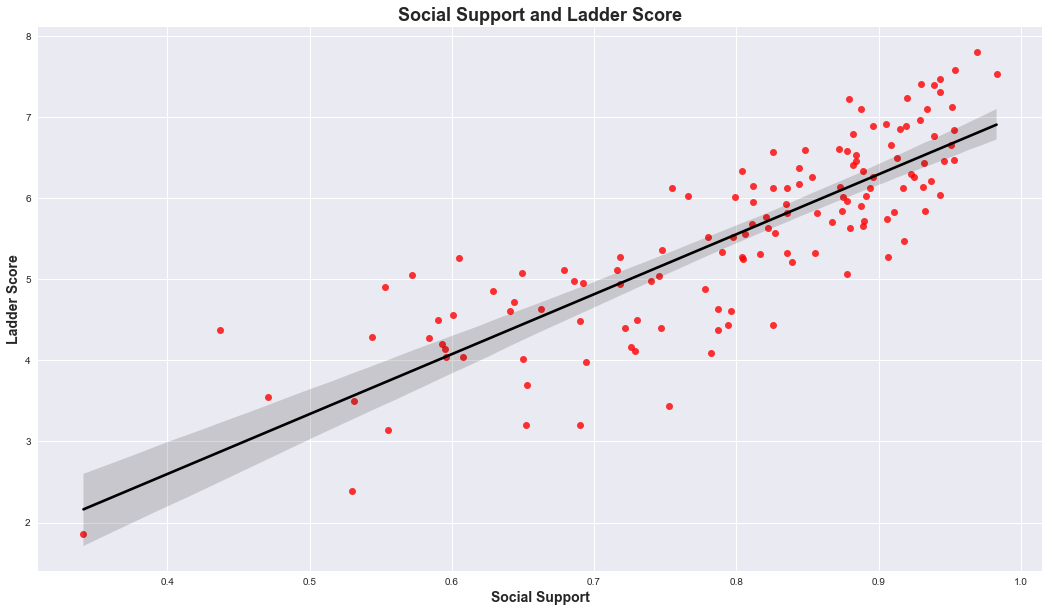

In [36]:
plt.figure(figsize=(18, 10))
sns.regplot(x='Social Support', y='Ladder Score', data=wh2023, scatter_kws={'color':'red'}, line_kws={'color':'black'} )
plt.xlabel('Social Support', fontweight='bold', fontsize=14)
plt.ylabel('Ladder Score', fontweight='bold', fontsize=14)
plt.title('Social Support and Ladder Score', fontweight='bold', fontsize=18)

The regplot shows a positive relationship between Ladder Score and Social Support; as the ladder score increases, the social support increases as well.

Text(0.5, 1.0, 'Logged GDP Per Capita and Ladder Score')

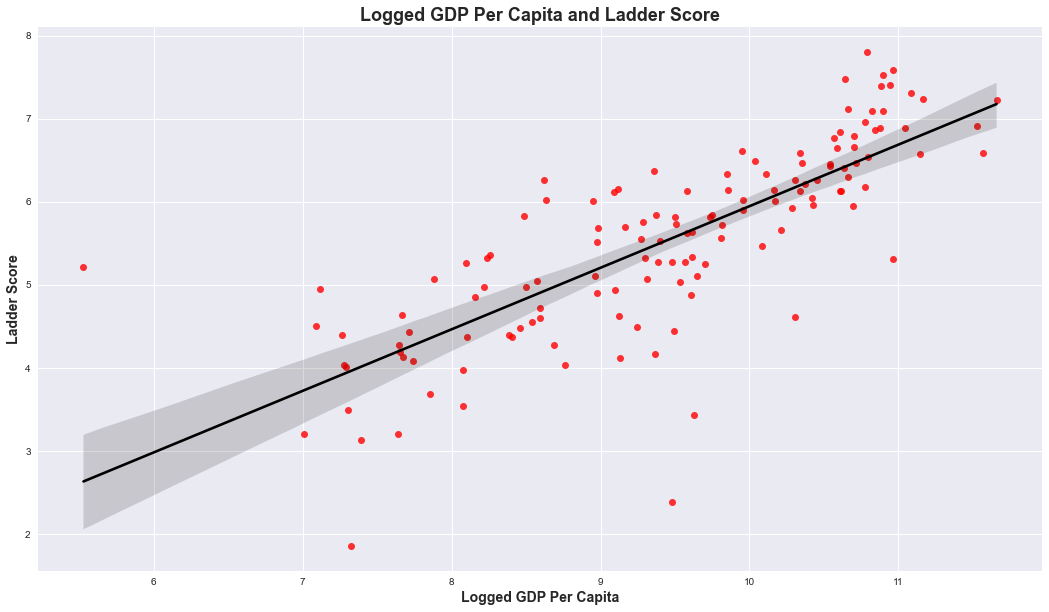

In [37]:
plt.figure(figsize=(18, 10))
sns.regplot(x='Logged GDP Per Capita', y='Ladder Score', data=wh2023, scatter_kws={'color':'red'}, line_kws={'color':'black'} )
plt.xlabel('Logged GDP Per Capita', fontweight='bold', fontsize=14)
plt.ylabel('Ladder Score', fontweight='bold', fontsize=14)
plt.title('Logged GDP Per Capita and Ladder Score', fontweight='bold', fontsize=18)

The regplot indicates a positive relationship between Ladder Score and logged GDP per capita; as the ladder score increases, the logged GDP per capita increases as well.

### Correlation Matrix

In [38]:
#drop some columns not needed in correlation

features = wh2023.drop('Global Ranking', axis=1)

In [39]:
corr_matrix = features.corr()

<AxesSubplot:>

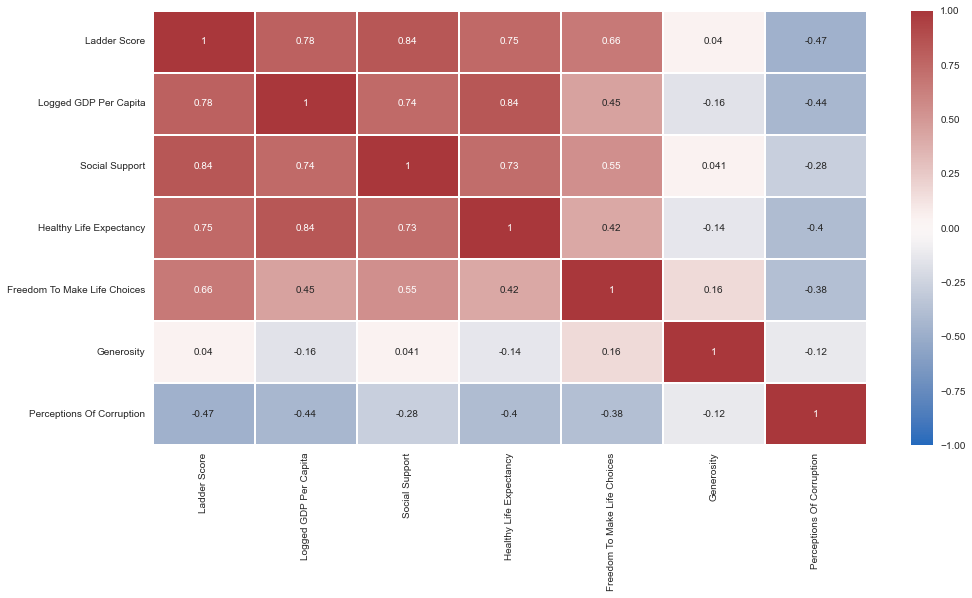

In [40]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='vlag', annot=True,linecolor='white', linewidth=2)

The heatmap shows how correlated the variables are with one another. The redder the square box is between variables, the more (higher) positive correlated they are; also, the darker the blue of the square box between variables, it shows how negatively related the variables are.

In the heatmap, the diagonal 1s are the correlation of a variable with itself which do not count. Hence, ladder score has the high correlation of 0.84 with social support and healthy life also has a high correlation of 0.84 with logged GDP per capita. As seen in the earlier regplot of ladder score and social support, the correlation shows there is a positive relationship between the two variables and it is a strong relationship of 0.84

In [41]:
pd.set_option('display.max_rows', 500)

corr_pair = corr_matrix.unstack()
corr_pair

Ladder Score                  Ladder Score                    1.000000
                              Logged GDP Per Capita           0.783836
                              Social Support                  0.838056
                              Healthy Life Expectancy         0.746928
                              Freedom To Make Life Choices    0.661960
                              Generosity                      0.039829
                              Perceptions Of Corruption      -0.470561
Logged GDP Per Capita         Ladder Score                    0.783836
                              Logged GDP Per Capita           1.000000
                              Social Support                  0.741762
                              Healthy Life Expectancy         0.837533
                              Freedom To Make Life Choices    0.449462
                              Generosity                     -0.162298
                              Perceptions Of Corruption      -0.435373
Social